In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df = pd.read_csv('Life_Expectancy.csv')

In [4]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
# Task 1: # Perform feature engineering
# Population Size
df['Population Size'] = pd.cut(df['Population'], bins=[1000, 30000, 100000, np.inf], labels=['Small', 'Medium', 'Large'])

In [6]:
# Lifestyle
df['Lifestyle'] = df['Alcohol'] * df[' BMI ']

In [7]:
# Economy
df['Economy'] = df['GDP'] / df['Population']

In [8]:
# Death Ratio
df['Death Ratio'] = df['Adult Mortality'] / df['infant deaths']


In [10]:
# Task 2: Data Cleaning
# For simplicity, let's drop rows with missing values
df.isnull().sum()
df = df.dropna()


In [11]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Population Size                    0
Lifestyle                          0
Economy                            0
Death Ratio                        0
dtype: int64

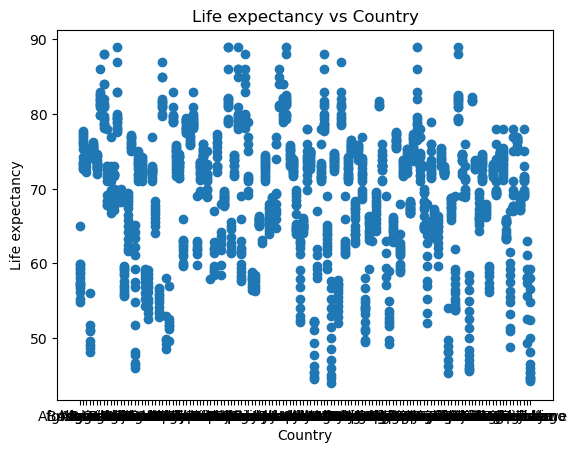

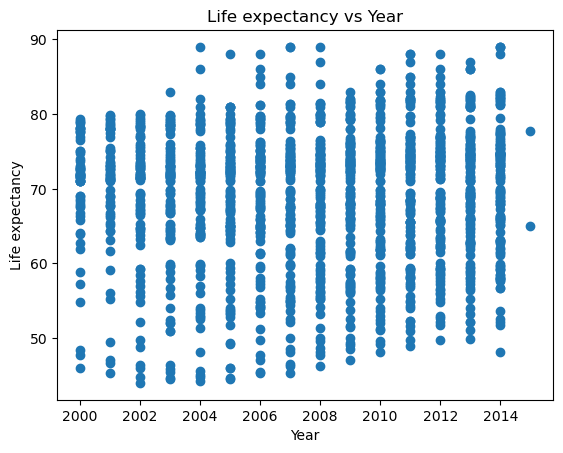

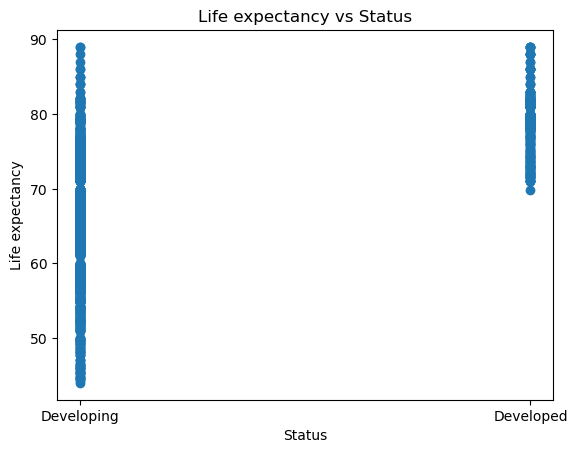

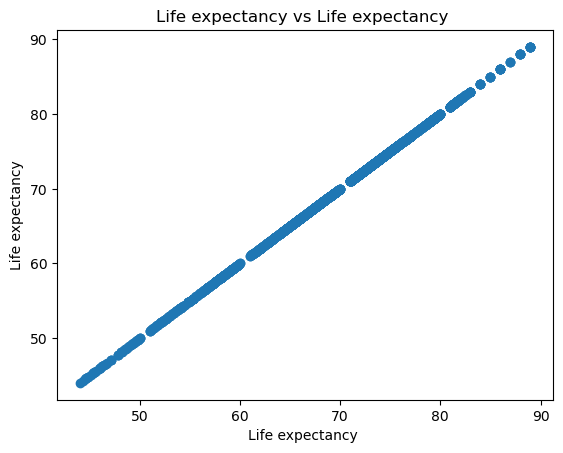

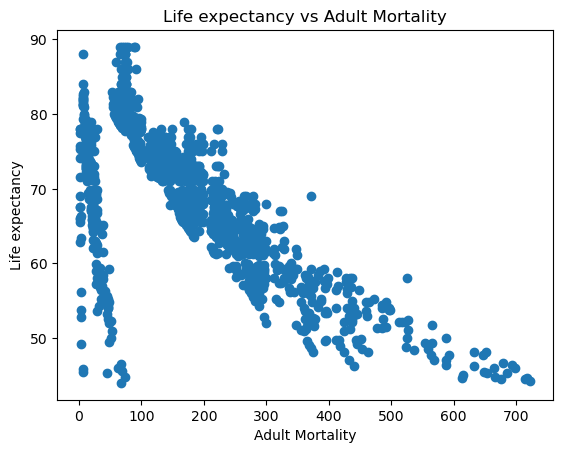

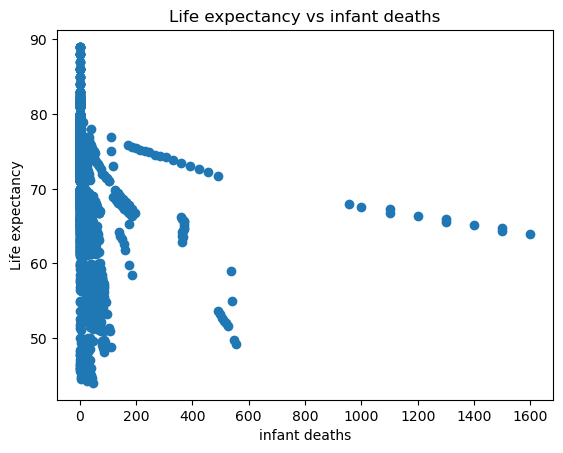

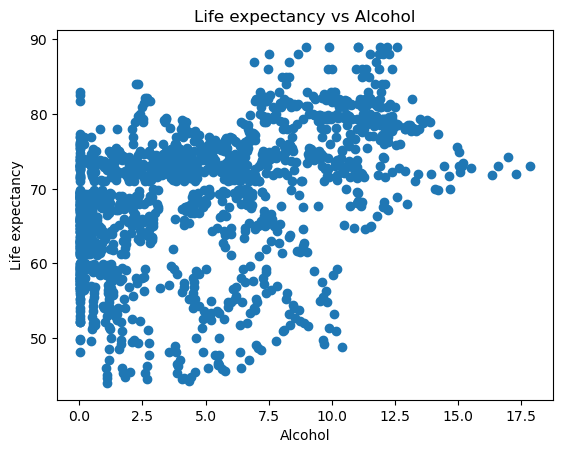

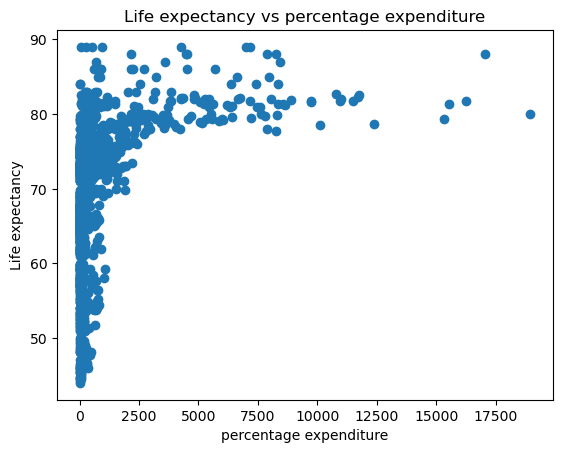

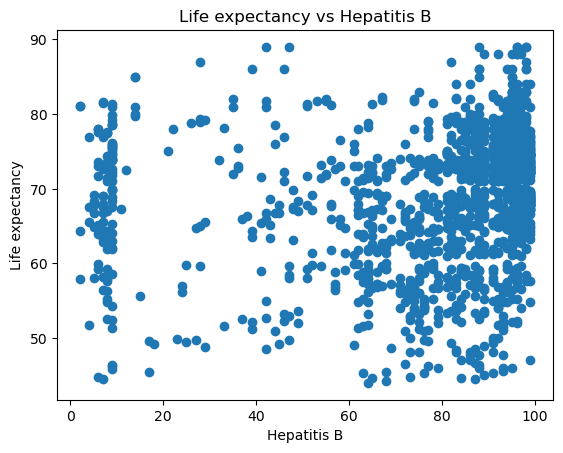

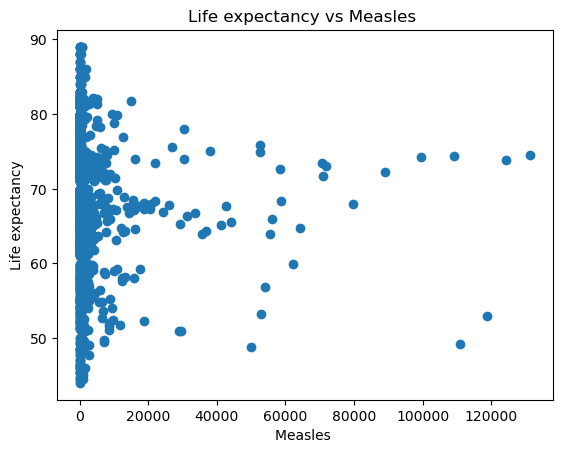

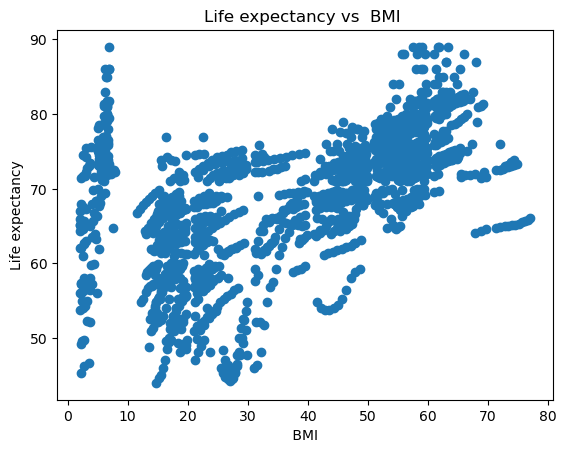

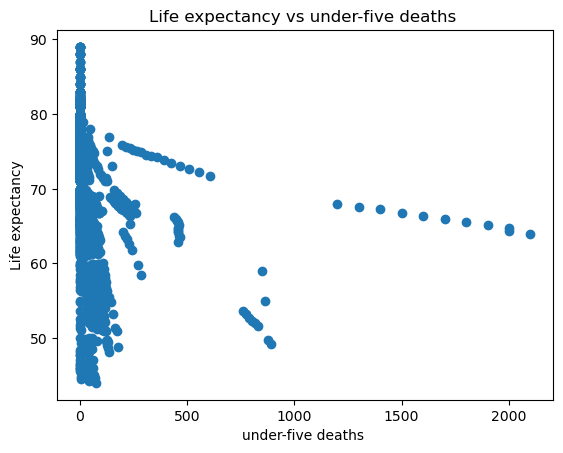

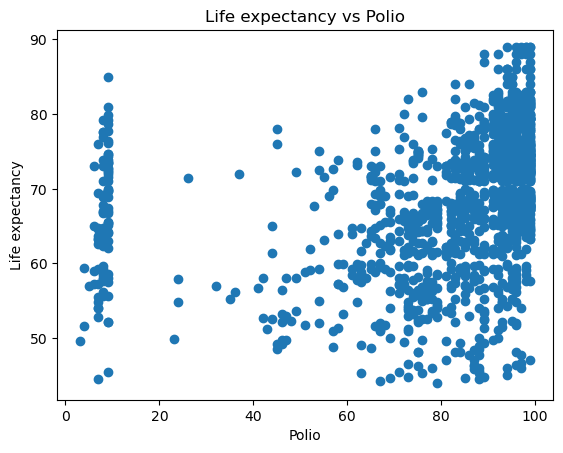

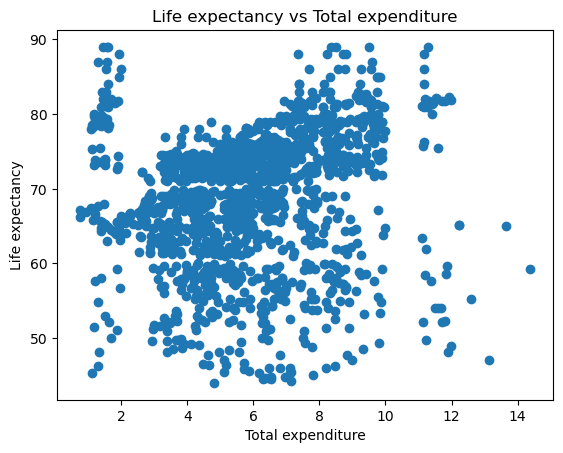

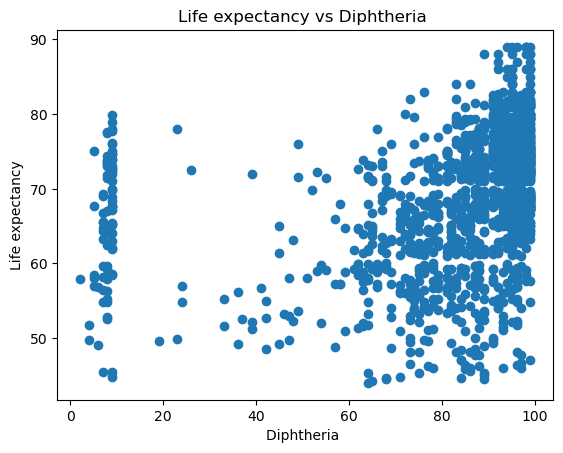

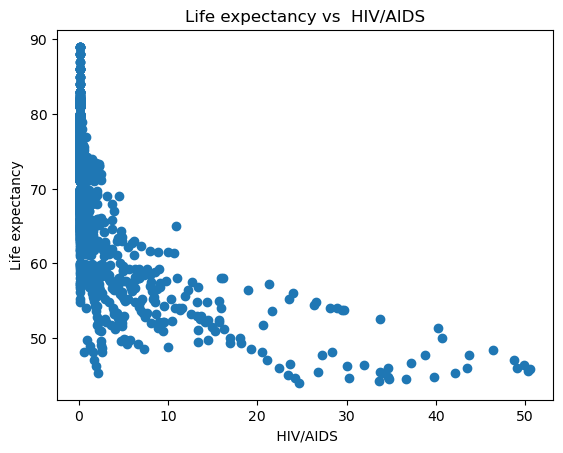

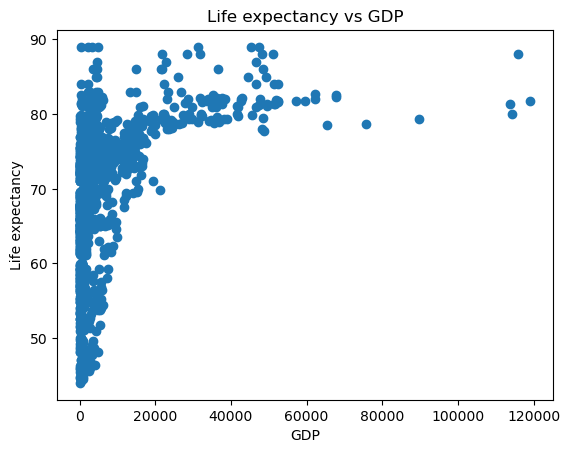

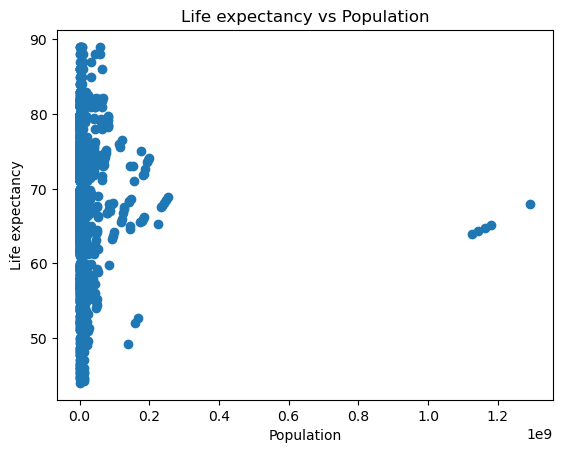

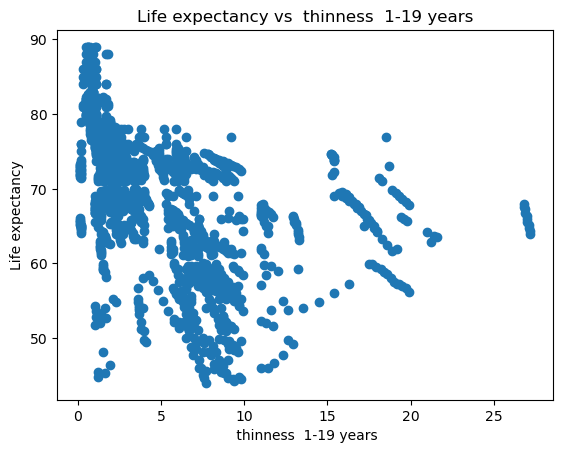

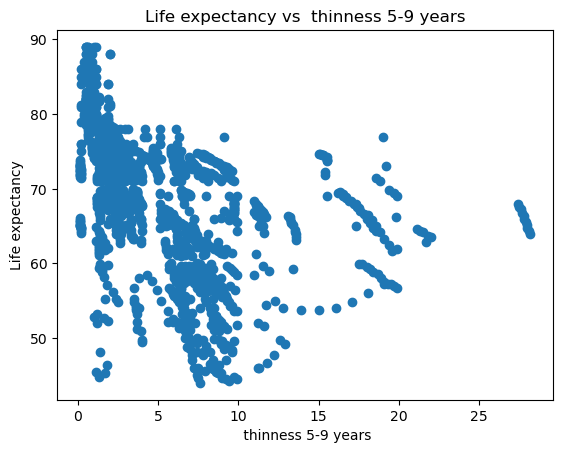

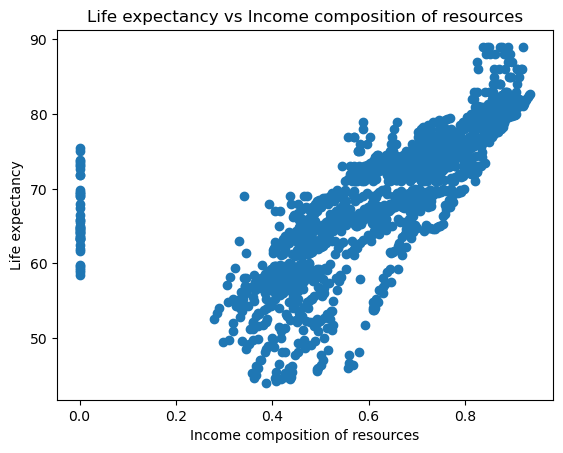

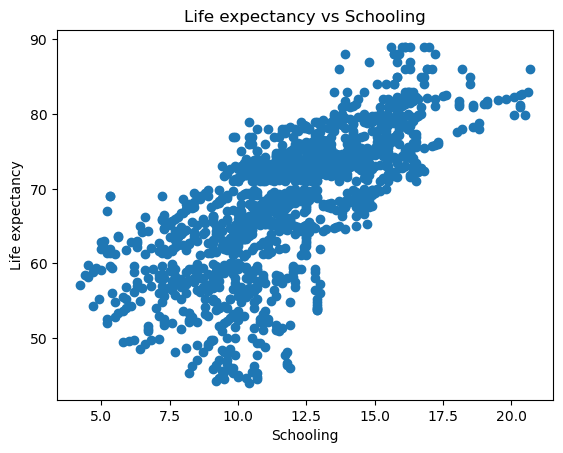

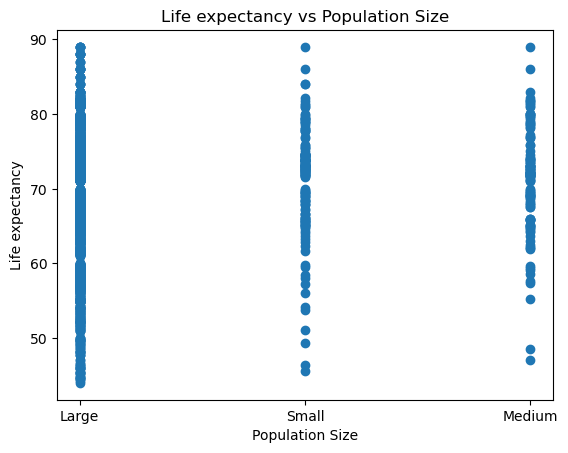

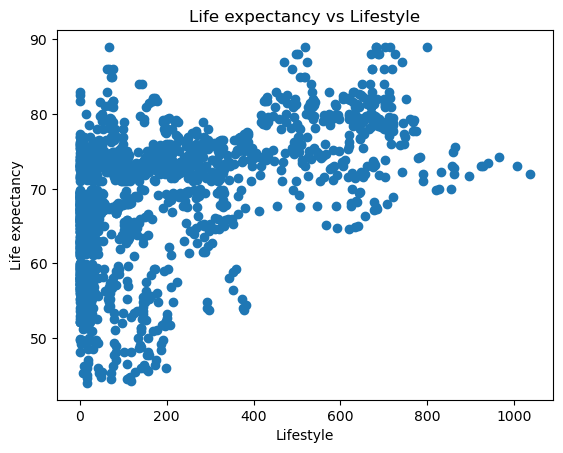

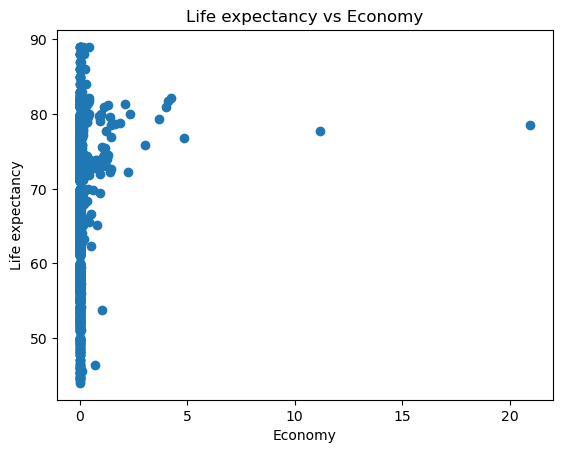

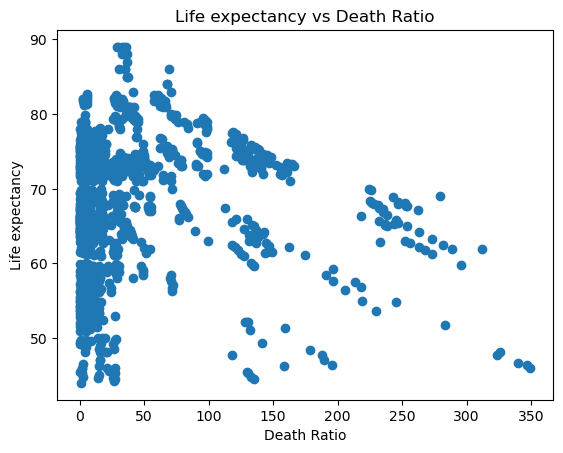

In [12]:
# Generate scatter plots between each predictor with the target variable
for column in df.columns:
    plt.figure()
    plt.scatter(df[column], df['Life expectancy '])
    plt.xlabel(column)
    plt.ylabel('Life expectancy')
    plt.title(f'Life expectancy vs {column}')
    plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df['Country'] = le.fit_transform(df['Country'])

C:\Users\USER\AppData\Local\Temp\ipykernel_4880\4258222986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = le.fit_transform(df['Country'])


In [17]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population Size,Lifestyle,Economy,Death Ratio
0,0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,Large,0.191,0.000017,4.241935
1,0,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,Large,0.186,0.001870,4.234375
2,0,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,Large,0.181,0.000020,4.060606
3,0,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,Large,0.176,0.000181,3.942029
4,0,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,Large,0.172,0.000021,3.873239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,131,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,454.366654,12777511.0,9.4,9.4,0.407,9.2,Large,118.156,0.000036,26.777778
2934,131,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,453.351155,12633897.0,9.8,9.9,0.418,9.5,Large,108.402,0.000036,27.500000
2935,131,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,57.348340,125525.0,1.2,1.3,0.427,10.0,Large,116.509,0.000457,2.920000
2936,131,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,548.587312,12366165.0,1.6,1.7,0.427,9.8,Large,44.548,0.000044,27.440000


In [18]:
df['Status'] = le.fit_transform(df['Status'])

C:\Users\USER\AppData\Local\Temp\ipykernel_4880\1994754145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] = le.fit_transform(df['Status'])


In [19]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population Size,Lifestyle,Economy,Death Ratio
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,Large,0.191,0.000017,4.241935
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,Large,0.186,0.001870,4.234375
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,Large,0.181,0.000020,4.060606
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,Large,0.176,0.000181,3.942029
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,Large,0.172,0.000021,3.873239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,131,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,454.366654,12777511.0,9.4,9.4,0.407,9.2,Large,118.156,0.000036,26.777778
2934,131,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,453.351155,12633897.0,9.8,9.9,0.418,9.5,Large,108.402,0.000036,27.500000
2935,131,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,57.348340,125525.0,1.2,1.3,0.427,10.0,Large,116.509,0.000457,2.920000
2936,131,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,548.587312,12366165.0,1.6,1.7,0.427,9.8,Large,44.548,0.000044,27.440000


In [21]:
df['Population Size'] = le.fit_transform(df['Population Size'])

C:\Users\USER\AppData\Local\Temp\ipykernel_4880\208126971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population Size'] = le.fit_transform(df['Population Size'])


In [22]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population Size,Lifestyle,Economy,Death Ratio
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,0.191,0.000017,4.241935
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,0,0.186,0.001870,4.234375
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,0.181,0.000020,4.060606
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,0.176,0.000181,3.942029
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,0.172,0.000021,3.873239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,131,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,118.156,0.000036,26.777778
2934,131,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,108.402,0.000036,27.500000
2935,131,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,57.348340,125525.0,1.2,1.3,0.427,10.0,0,116.509,0.000457,2.920000
2936,131,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,44.548,0.000044,27.440000


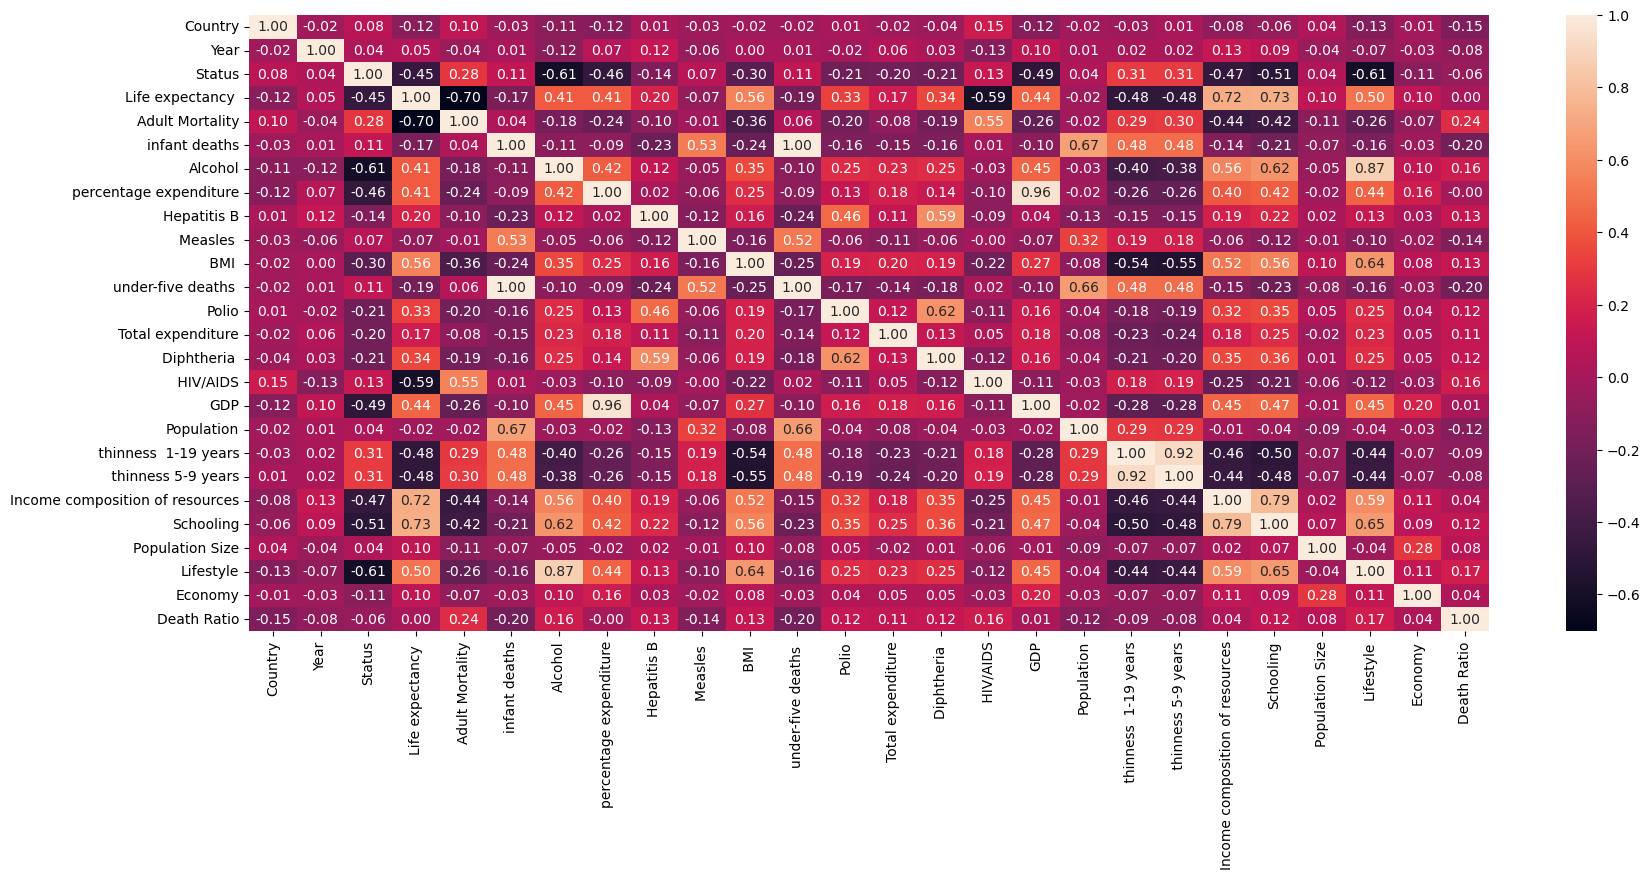

In [28]:
# Task 3: Generate a correlation heat map
corr = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [29]:
# Drop variables with correlation above 0.75
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.75:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

<Axes: >

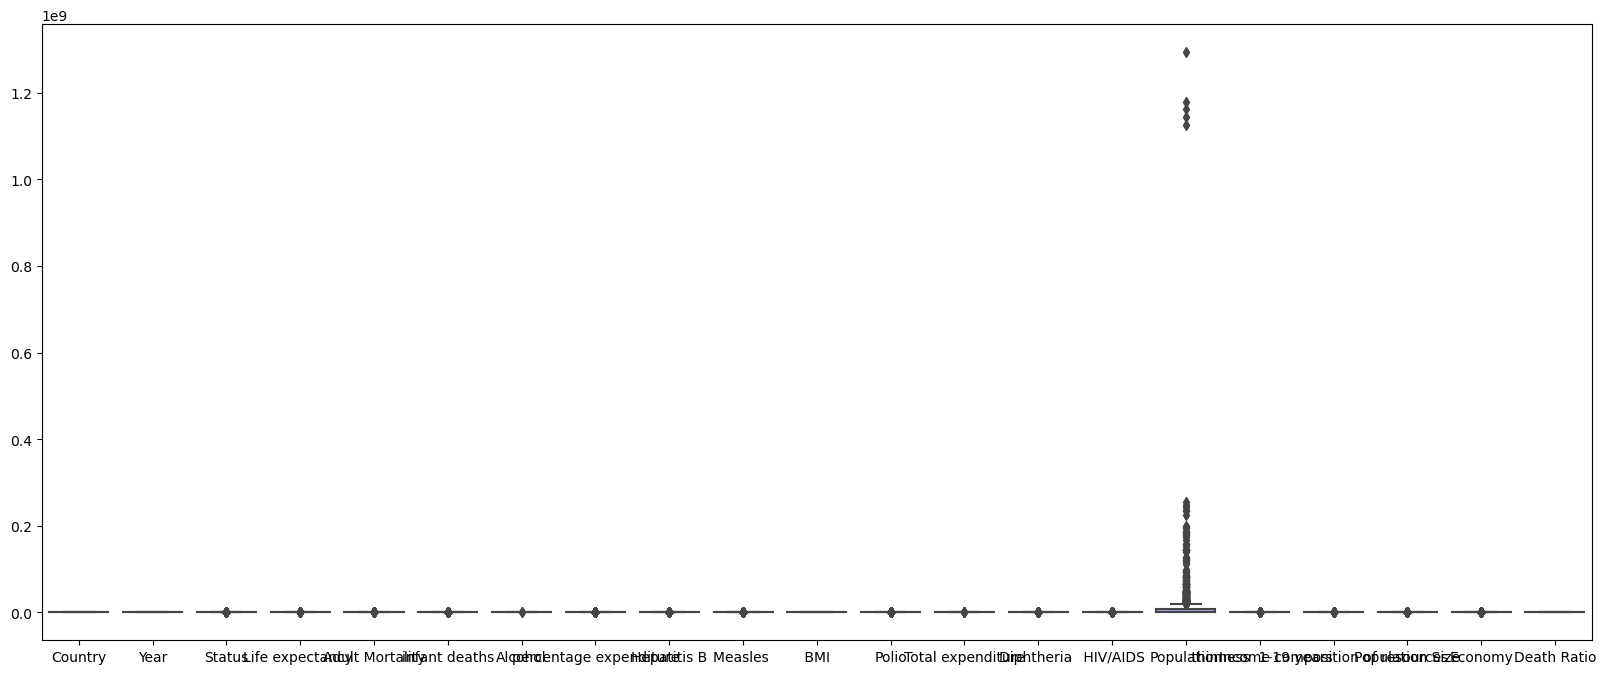

In [33]:
# Task 4: Eliminate possible outliers
plt.figure(figsize=(20,8))
sns.boxplot(data=df)

In [34]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [38]:
# Task 5: Data Analysis
# For simplicity, let's just look at the correlation between the variables and life expectancy
correlation = df.corr()['Life expectancy ']
print(correlation)

Country                           -0.113588
Year                              -0.040703
Status                                  NaN
Life expectancy                    1.000000
Adult Mortality                   -0.489644
infant deaths                     -0.430573
Alcohol                            0.388674
percentage expenditure             0.272766
Hepatitis B                        0.014440
Measles                           -0.157270
 BMI                               0.443542
Polio                              0.021544
Total expenditure                  0.354723
Diphtheria                         0.041797
 HIV/AIDS                         -0.304108
Population                         0.047113
 thinness  1-19 years             -0.400806
Income composition of resources    0.692330
Population Size                         NaN
Economy                            0.148343
Death Ratio                        0.109278
Name: Life expectancy , dtype: float64


In [ ]:
Based on the correlation results, here are the answers to the questions:

1. Should a country having a lower life expectancy value (<65) increase its healthcare expenditure to improve its average lifespan?
ANS: The correlation between ‘Total expenditure’ (which could be interpreted as healthcare expenditure) and ‘Life expectancy’ is 0.354723. This is a positive correlation, suggesting that countries with higher healthcare expenditure tend to have higher life expectancy. Therefore, a country with a lower life expectancy might consider increasing its healthcare expenditure to improve its average lifespan.
2. What is the impact of schooling on the lifespan of humans?
ANS: The ‘Schooling’ variable is not included in the dataset. Therefore, based on the given data, I cannot provide an answer to this question.



In [49]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Population Size,Economy,Death Ratio
21,1,2010,1,76.2,91.0,1,5.28,41.822757,99.0,10,...,99.0,5.34,99.0,0.1,291321.0,1.4,0.725,0,0.001697,91.000000
22,1,2009,1,76.1,91.0,1,5.79,348.055952,98.0,0,...,98.0,5.79,98.0,0.1,2927519.0,1.5,0.721,0,0.001405,91.000000
23,1,2008,1,75.3,1.0,1,5.61,36.622068,99.0,0,...,99.0,5.87,99.0,0.1,2947314.0,1.6,0.713,0,0.000148,1.000000
25,1,2006,1,74.2,99.0,1,5.31,3.302154,98.0,68,...,97.0,5.86,97.0,0.1,2992547.0,1.7,0.696,0,0.000012,99.000000
26,1,2005,1,73.5,15.0,1,5.16,26.993121,98.0,6,...,97.0,6.12,98.0,0.1,311487.0,1.8,0.685,0,0.000896,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,127,2003,1,75.4,121.0,1,5.11,160.840014,91.0,0,...,91.0,6.52,91.0,0.1,3325637.0,1.7,0.747,0,0.001089,121.000000
2823,127,2002,1,75.4,124.0,1,5.86,27.468810,95.0,0,...,93.0,7.18,95.0,0.1,3327773.0,1.7,0.746,0,0.000147,124.000000
2829,128,2012,1,68.8,184.0,18,0.01,16.714063,99.0,0,...,99.0,6.49,99.0,0.1,297745.0,3.0,0.673,0,0.000586,10.222222
2832,128,2009,1,68.0,183.0,21,2.56,92.814798,98.0,0,...,99.0,6.31,98.0,0.2,277674.0,3.1,0.651,0,0.004369,8.714286


In [57]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'Population', ' thinness  1-19 years',
       'Income composition of resources', 'Population Size', 'Economy',
       'Death Ratio'],
      dtype='object')

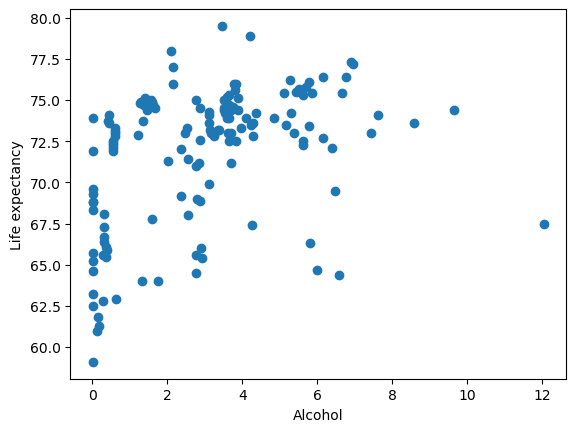

In [60]:
plt.scatter(y="Life expectancy ", x="Alcohol",data=df)

plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')
plt.show()

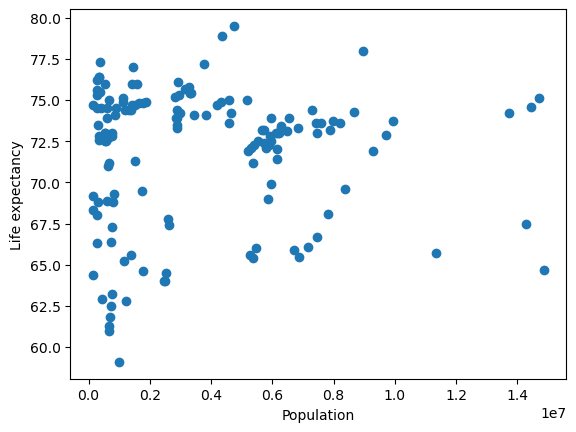

In [62]:
plt.scatter(y="Life expectancy ", x="Population",data=df)

plt.xlabel('Population')
plt.ylabel('Life expectancy')
plt.show()

In [ ]:
3. Does Life Expectancy have a positive or negative relationship with drinking alcohol?
The correlation between ‘Alcohol’ and ‘Life expectancy’ is 0.388674, This is a positive correlation. And from the scatter plot, we can see that as the Life expectancy is increasing, alcohol on the x axis is increasing. Suggesting that higher alcohol consumption is associated with higher life expectancy. However, this does not imply causation and the relationship could be influenced by other factors. For example, countries with higher life expectancy might have higher levels of wealth and healthcare, which could lead to higher alcohol consumption.
Do densely populated countries tend to have a lower life expectancy?
The correlation between ‘Population’ and ‘Life expectancy’ is 0.047113. This is a very weak positive correlation, even the scatterplot suggests same, indicating that population density has little to no effect on life expectancy based on the given data.

In [39]:
# Task 5: Train the linear regression model
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Assess the performance
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}, MAPE: {mape}, R2 Score: {r2}')

RMSE: 3.5528162211199406, MAPE: 3.6962163023039603, R2 Score: 0.22752211257025


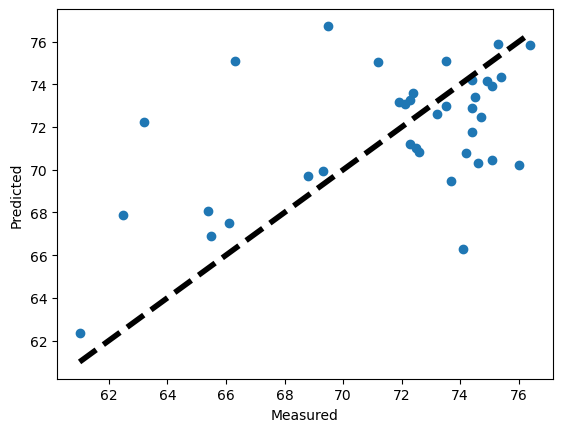

In [43]:
# Draw a residual scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4880\201574071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50)


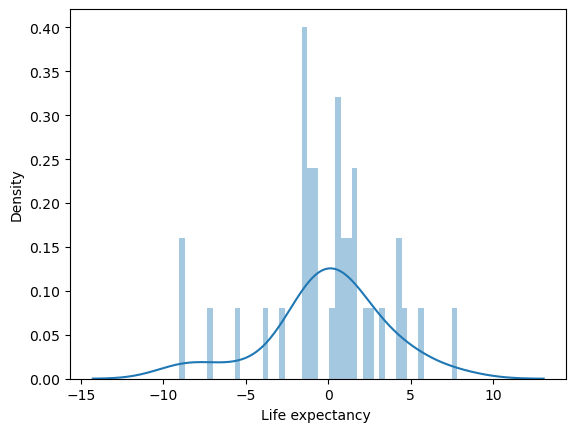

In [44]:
# Draw residual histogram
sns.distplot((y_test-y_pred),bins=50)
plt.show()

In [63]:
# Import necessary libraries to Perform appropriate cross-validation to check if the linear regression model has data overfit
from sklearn.model_selection import cross_val_score, KFold

In [64]:
# Define the cross-validation method
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [65]:
# Perform cross-validation
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [66]:
# Convert scores to positive
scores = np.absolute(scores)

In [67]:
# Print the mean and standard deviation of scores
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))


Mean MAE: 2.150 (0.448)


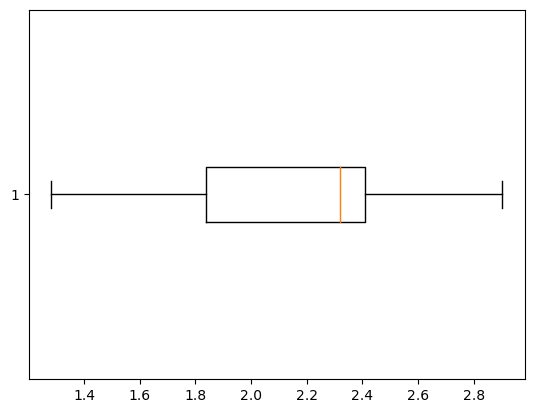

In [68]:
# Generate box plot
plt.boxplot(scores, vert=False)
plt.show()

In [ ]:
#Task 6: Determining the minimum number of features that need to be included to ensure that all the data is bound within the error lines mentioned above.

In [69]:
from sklearn.feature_selection import RFE


In [70]:
# Define the method
rfe = RFE(model, n_features_to_select=1)

In [71]:
# Fit the model
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [72]:
# Get the ranking of features
ranking = rfe.ranking_


In [73]:
# Print the feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{X.columns[i]}: {ranking[i]}")

Feature ranking:
Country: 17
Year: 16
Status: 19
Adult Mortality: 11
infant deaths: 6
Alcohol: 7
percentage expenditure: 15
Hepatitis B: 10
Measles : 12
 BMI : 13
Polio: 9
Total expenditure: 4
Diphtheria : 8
 HIV/AIDS: 3
Population: 18
 thinness  1-19 years: 5
Income composition of resources: 2
Population Size: 20
Economy: 1
Death Ratio: 14
